In [2]:
library(DropletUtils)
library(scds)
library(feather)
library(Matrix)
library(SoupX)
library(data.table)
library(Seurat)

In [6]:
dataDirs1 = c("/Monkey_P_Nacc_Rep1")

In [7]:
toc = Seurat::Read10X(file.path(dataDirs1, "filtered_feature_bc_matrix", "soupx_data"))
tod = Seurat::Read10X(file.path(dataDirs1, "raw_feature_bc_matrix", "soupx_data"))
#sc = SoupChannel(tod, toc)

In [8]:
sc1 = SoupChannel(tod, toc, calcSoupProfile = FALSE)
sc1 = estimateSoup(sc1)

In [9]:
sc1

Channel with 54894 genes and 12185 cells



In [10]:
str(sc1)

List of 4
 $ toc        :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:44480322] 25 73 76 88 99 108 111 112 120 124 ...
  .. ..@ p       : int [1:12186] 0 4313 9443 11845 15688 17661 19051 26982 33594 36878 ...
  .. ..@ Dim     : int [1:2] 54894 12185
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:54894] "WASH7P" "MIR6859-1" "MIR1302-2HG" "MIR1302-2" ...
  .. .. ..$ : chr [1:12185] "AAACCCAAGCCATGCC-1" "AAACCCAAGTATTGCC-1" "AAACCCACAAATGGAT-1" "AAACCCACACGCCACA-1" ...
  .. ..@ x       : num [1:44480322] 2 2 6 3 1 1 1 2 2 1 ...
  .. ..@ factors : list()
 $ metaData   :'data.frame':	12185 obs. of  1 variable:
  ..$ nUMIs: num [1:12185] 10530 15649 3836 8730 2871 ...
 $ nDropUMIs  : Named num [1:6794880] 1 3 4 0 0 0 0 0 0 0 ...
  ..- attr(*, "names")= chr [1:6794880] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
 $ soupProfile:'data.frame':	54894 obs. of  2 variables:
  ..$ est   : num [1:54894] 0 0 0 0 0 0 0

In [11]:
set.seed(1)

In [12]:
srat = CreateSeuratObject(sc1$toc)

In [13]:
srat = NormalizeData(srat)

In [14]:
srat = ScaleData(srat)

Centering and scaling data matrix



In [15]:
#srat = FindVariableGenes(srat)
srat = FindVariableFeatures(srat)

In [16]:
srat = RunPCA(srat,pcs.compute=30)

PC_ 1 
Positive:  SLC1A2, SLC1A3, NEAT1, PDZRN4, AL355612.1, ADGRV1, NHSL1, ZEB2, ETNPPL, LINC00499 
	   CABLES1, TCF7L2, SLC25A18, ALDH1A1, ITPKB, MBP, ACSBG1, C10orf90, MFGE8, GLI3 
	   AC099792.1, FBXL7, RNF219-AS1, ST18, TCF7L1, AC008957.2, LINC00511, SLC6A11, XIRP2, PIP4K2A 
Negative:  PTPRN2, CACNA1C, MYT1L, ABLIM2, SPTBN4, SHANK2, CELF5, SRRM3, KSR2, KLHL29 
	   CELF4, RBFOX3, DLGAP2, KCNMA1, GABRB3, TMEM178B, ATP8A2, RAP1GAP2, CACNA1E, DPP6 
	   RBFOX1, AGBL4, RIMBP2, TENM4, CACNA1D, AL117190.2, RYR2, CNTNAP2, AFF3, GRIN1 
PC_ 2 
Positive:  ELMO1, ST18, MBP, SLC24A2, RNF220, AL008633.1, MOBP, ENPP2, PPP1R16B, PIP4K2A 
	   ZNF536, AL359091.1, PLCL1, FRMD4B, MOG, CLMN, AJ009632.2, PEX5L, HAPLN2, FA2H 
	   MAG, ZEB2, CREB5, SH3TC2, DSCAML1, ST6GALNAC3, SHROOM4, C10orf90, PDE8A, MYRF 
Negative:  CABLES1, SLC25A18, SLC6A11, PDZRN4, LINC00499, AL355612.1, NHSL1, ADGRV1, ROR1, ETNPPL 
	   SLC1A2, SORCS2, TCF7L1, ACSBG1, ALDH1A1, GLI3, TRPM3, MFGE8, AC099792.1, SLC1A3 
	   TNC, AC00895

In [17]:
srat = RunTSNE(srat,dims.use=seq(30))

In [18]:
srat <- FindNeighbors(srat, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [19]:
srat = FindClusters(srat, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12185
Number of edges: 502139

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9428
Number of communities: 25
Elapsed time: 4 seconds


In [20]:
str(srat)

Formal class 'Seurat' [package "Seurat"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:44480322] 25 73 76 88 99 108 111 112 120 124 ...
  .. .. .. .. .. ..@ p       : int [1:12186] 0 4313 9443 11845 15688 17661 19051 26982 33594 36878 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 54894 12185
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:54894] "WASH7P" "MIR6859-1" "MIR1302-2HG" "MIR1302-2" ...
  .. .. .. .. .. .. ..$ : chr [1:12185] "AAACCCAAGCCATGCC-1" "AAACCCAAGTATTGCC-1" "AAACCCACAAATGGAT-1" "AAACCCACACGCCACA-1" ...
  .. .. .. .. .. ..@ x       : num [1:44480322] 2 2 6 3 1 1 1 2 2 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:44480322] 25 73 76 88 99 108

In [21]:
PBMC_DR = as.data.frame(srat$tsne@cell.embeddings)

In [22]:
colnames(PBMC_DR) = c('RD1','RD2')

In [23]:
str(PBMC_DR)

'data.frame':	12185 obs. of  2 variables:
 $ RD1: num  17.6 23.17 24.18 -8.61 18.65 ...
 $ RD2: num  -20 -41.8 23.2 -13 -12.1 ...


In [24]:
PBMC_DR$Cluster = factor(srat@meta.data[rownames(PBMC_DR),'RNA_snn_res.0.5'])

In [25]:
str(srat@meta.data)

'data.frame':	12185 obs. of  5 variables:
 $ orig.ident     : Factor w/ 1 level "SeuratProject": 1 1 1 1 1 1 1 1 1 1 ...
 $ nCount_RNA     : num  10530 15649 3836 8730 2871 ...
 $ nFeature_RNA   : int  4313 5130 2402 3843 1973 1390 7931 6612 3284 3344 ...
 $ RNA_snn_res.0.5: Factor w/ 25 levels "0","1","2","3",..: 10 4 9 7 4 5 7 7 2 1 ...
 $ seurat_clusters: Factor w/ 25 levels "0","1","2","3",..: 10 4 9 7 4 5 7 7 2 1 ...


In [23]:
getwd()

[1] "/home/stauffer/Documents/Jing/p01_scRNA_striatum/Peanut/1_soupx"

In [24]:
#saveRDS(PBMC_DR, file = "~/Documents/Jing/p01_scRNA_striatum/Peanut/1_soupx/nacc_2_DR.rds")

In [26]:
#PBMC_DR <- readRDS("nacc_2_DR.rds")

In [27]:
str(PBMC_DR)

'data.frame':	12185 obs. of  3 variables:
 $ RD1    : num  17.6 23.17 24.18 -8.61 18.65 ...
 $ RD2    : num  -20 -41.8 23.2 -13 -12.1 ...
 $ Cluster: Factor w/ 25 levels "0","1","2","3",..: 10 4 9 7 4 5 7 7 2 1 ...


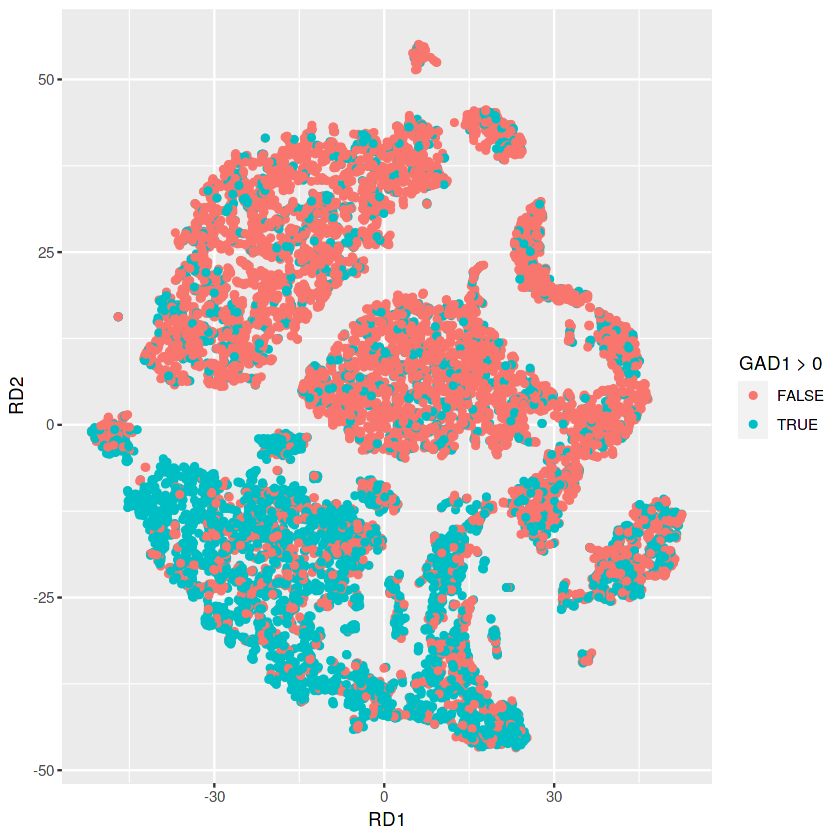

In [28]:
library(ggplot2)
PBMC_DR$GAD1 = sc1$toc["GAD1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = GAD1 > 0))
plot(gg)

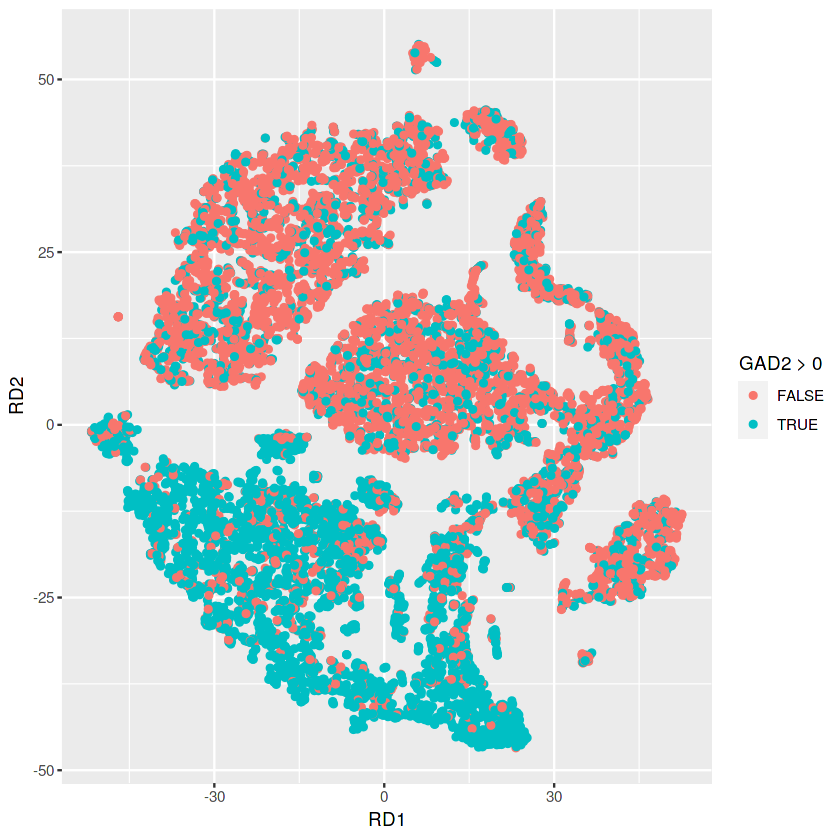

In [29]:
library(ggplot2)
PBMC_DR$GAD2 = sc1$toc["GAD2", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = GAD2 > 0))
plot(gg)

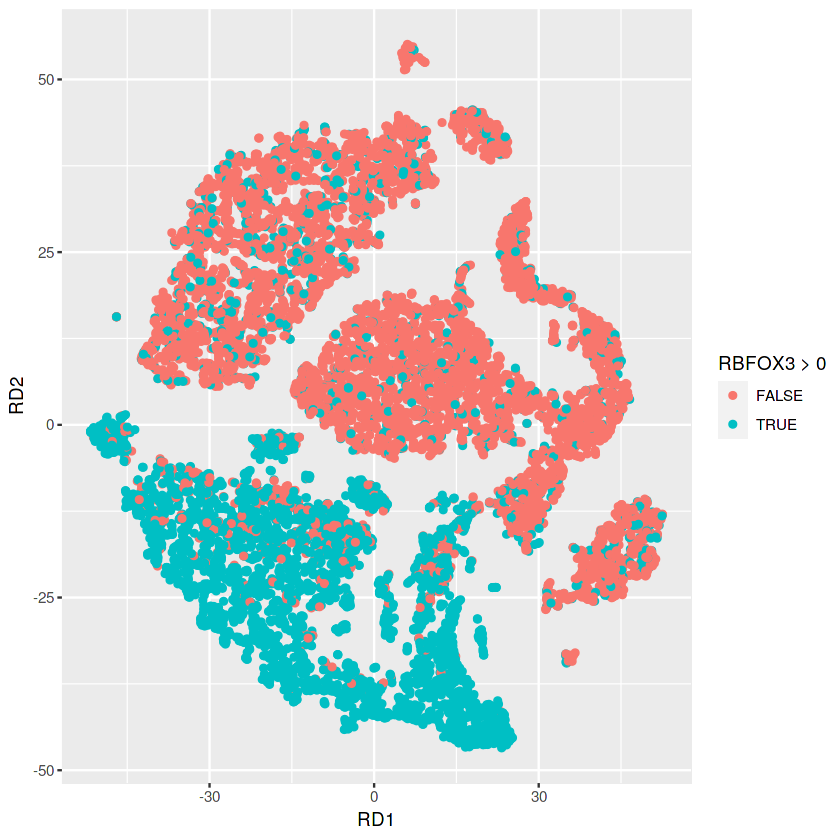

In [30]:
library(ggplot2)
PBMC_DR$RBFOX3 = sc1$toc["RBFOX3", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = RBFOX3 > 0))
plot(gg)

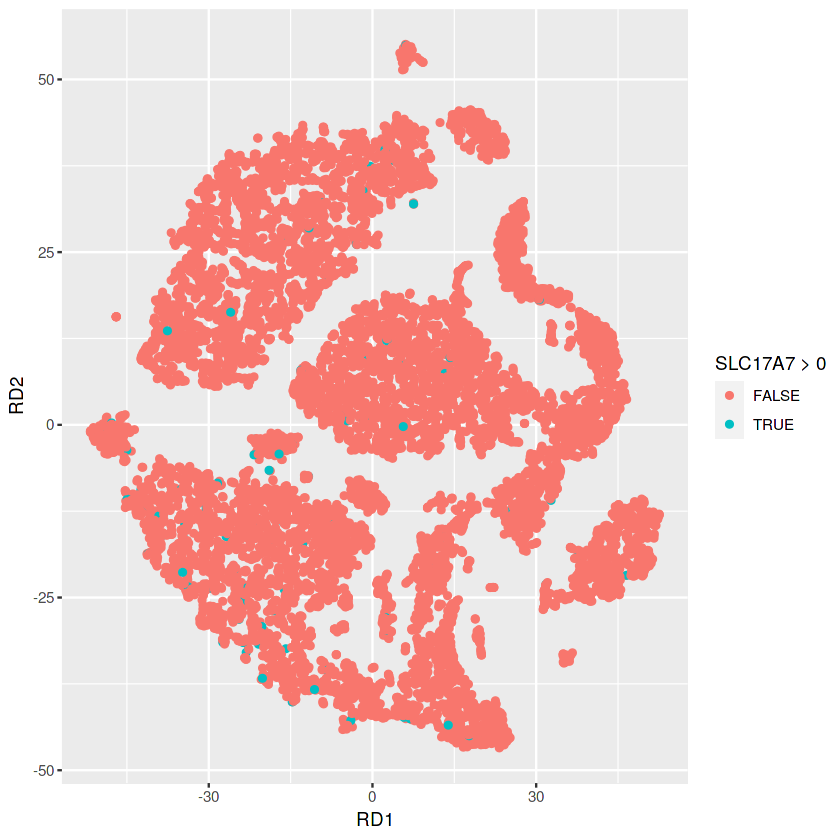

In [31]:
library(ggplot2)
PBMC_DR$SLC17A7 = sc1$toc["SLC17A7", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = SLC17A7 > 0))
plot(gg)

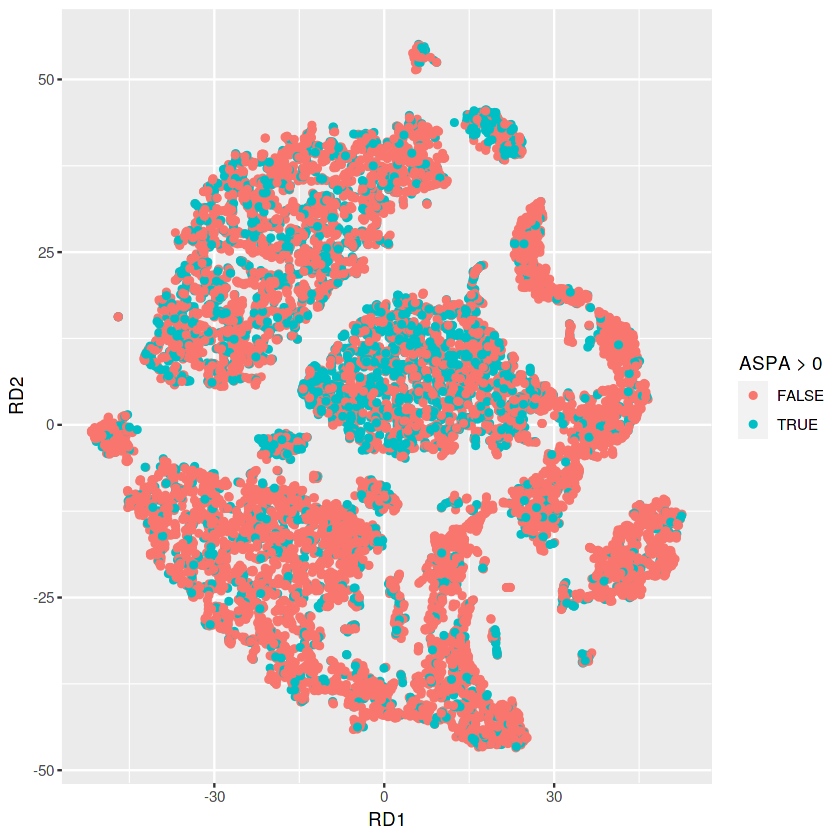

In [32]:
library(ggplot2)
PBMC_DR$ASPA = sc1$toc["ASPA", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = ASPA > 0))
plot(gg)

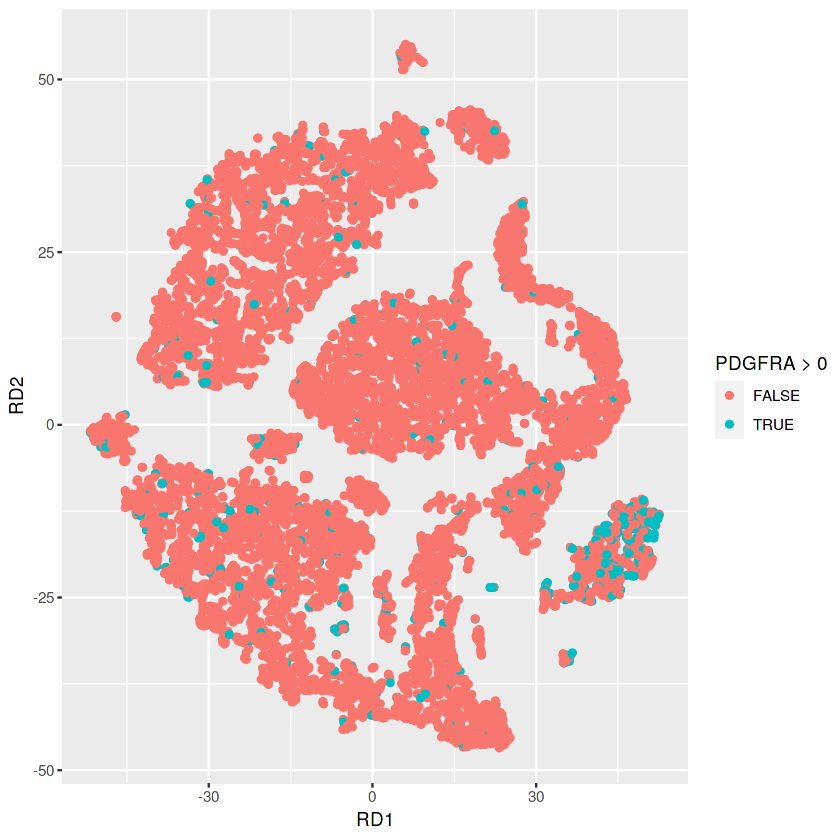

In [33]:
library(ggplot2)
PBMC_DR$PDGFRA = sc1$toc["PDGFRA", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = PDGFRA > 0))
plot(gg)

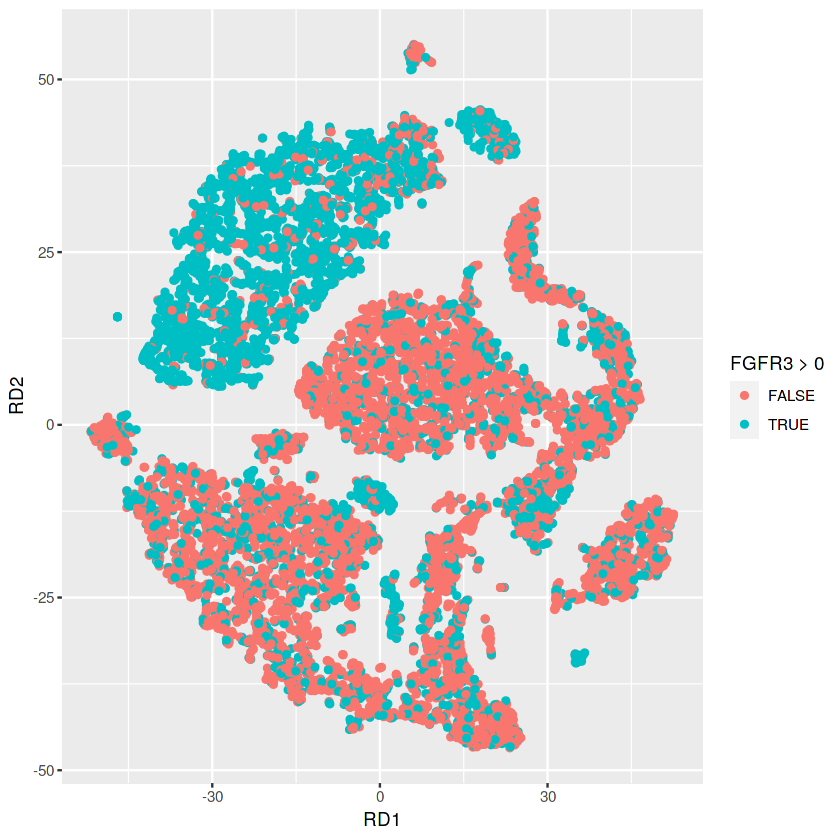

In [34]:
library(ggplot2)
PBMC_DR$FGFR3 = sc1$toc["FGFR3", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = FGFR3 > 0))
plot(gg)

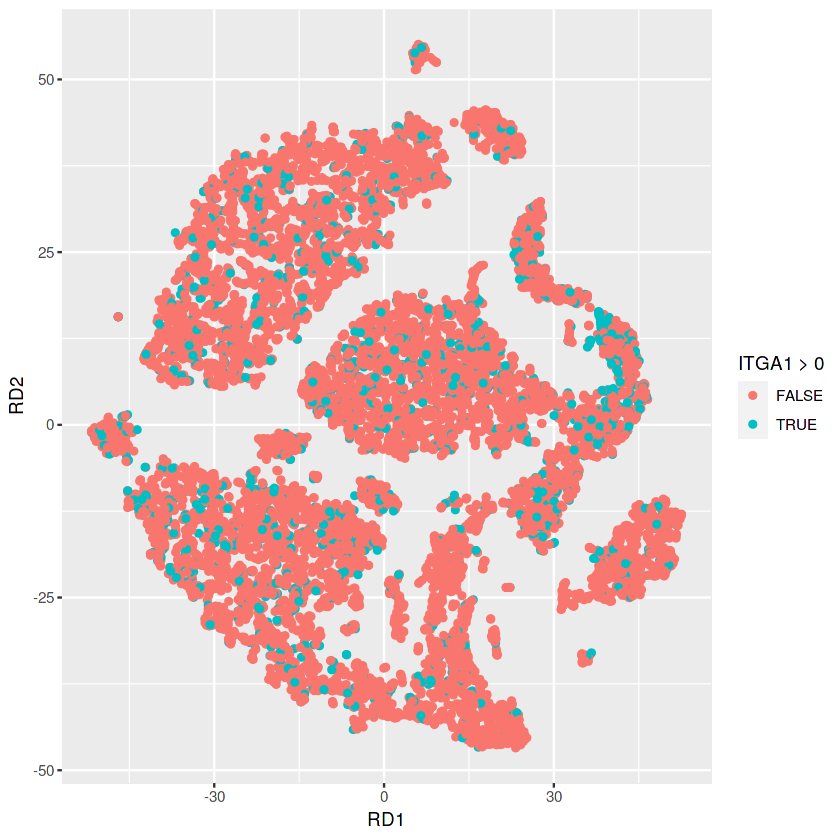

In [35]:
library(ggplot2)
PBMC_DR$ITGA1 = sc1$toc["ITGA1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = ITGA1 > 0))
plot(gg)

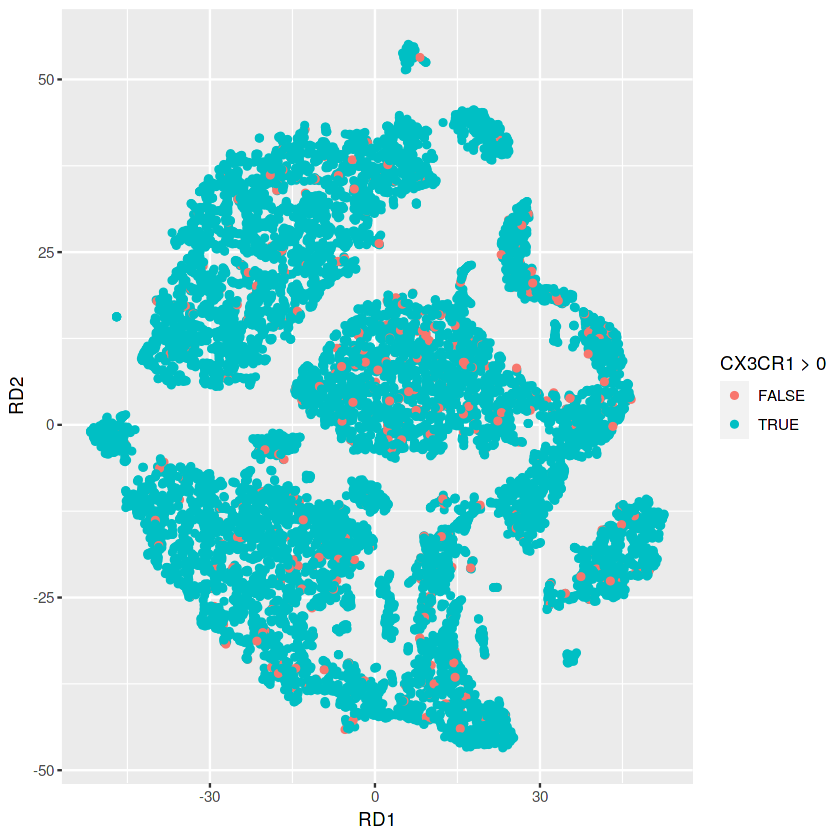

In [36]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["GFAP", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

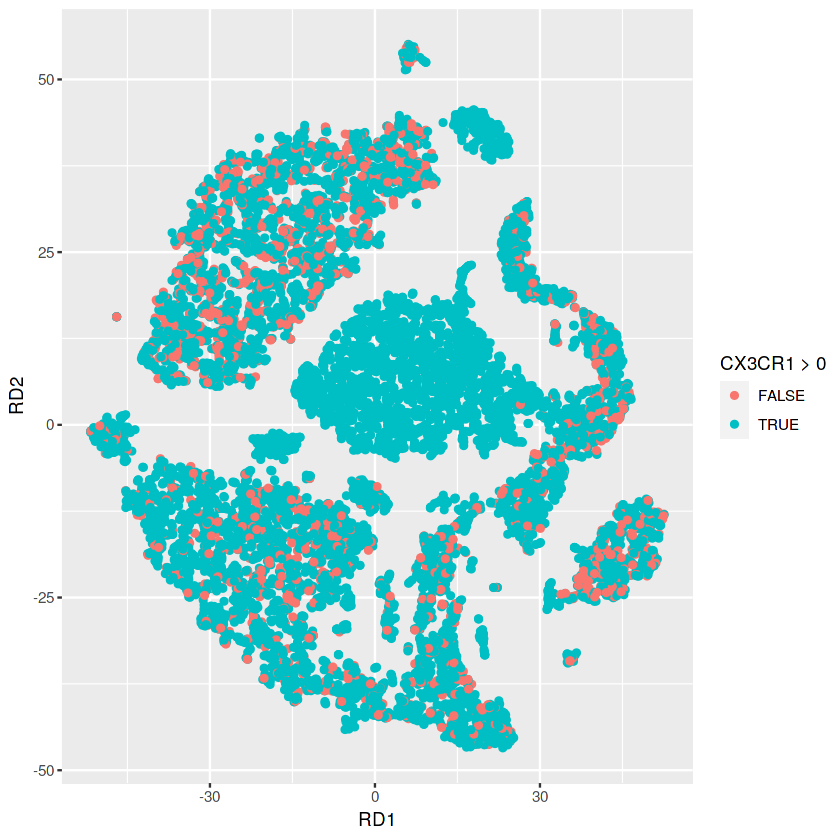

In [37]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["MBP", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

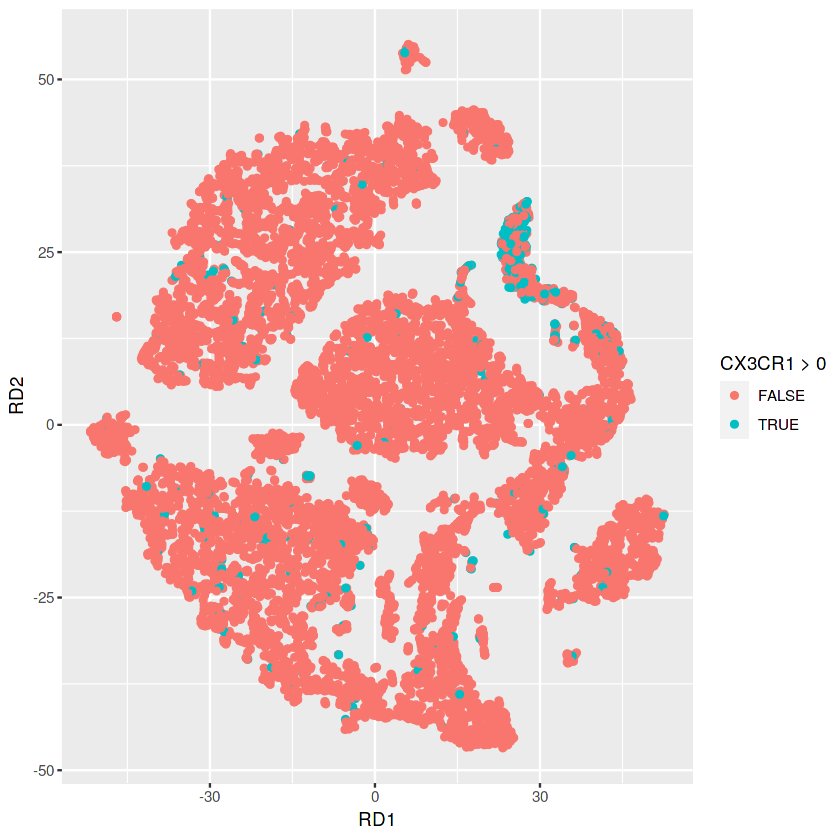

In [38]:
library(ggplot2)
PBMC_DR$CX3CR1 = sc1$toc["CX3CR1", rownames(PBMC_DR)]
gg = ggplot(PBMC_DR, aes(RD1, RD2)) + geom_point(aes(colour = CX3CR1 > 0))
plot(gg)

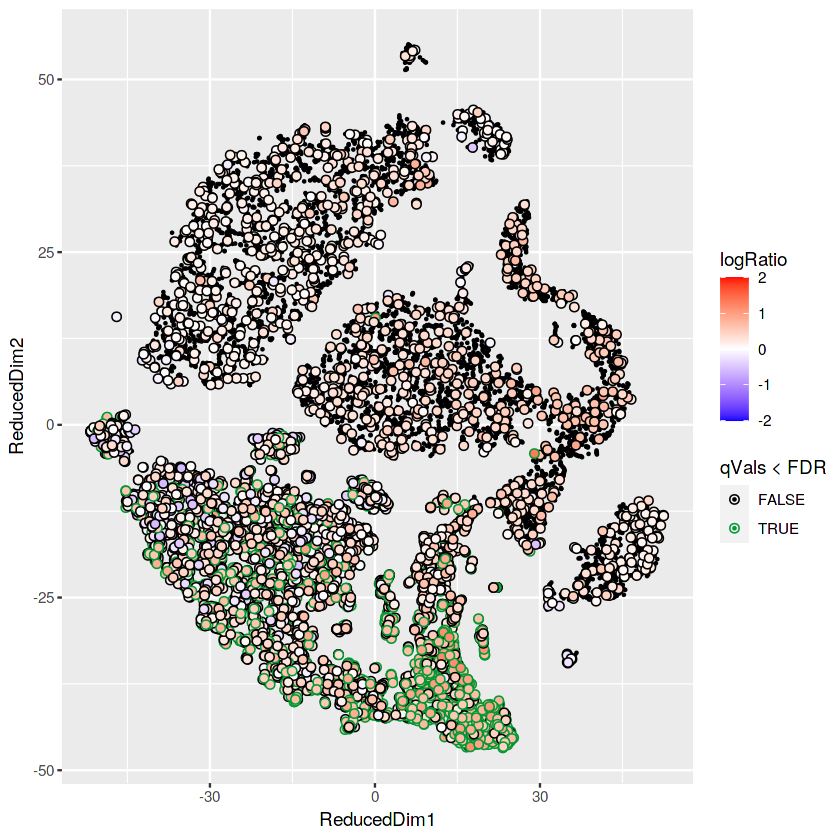

In [39]:
gg = plotMarkerMap(sc1, "RBFOX3", PBMC_DR)
plot(gg)

In [40]:
sc1 = setDR(sc1, PBMC_DR)

Warning message in setDR(sc1, PBMC_DR):
“DR has 12 columns where 2 were expected.  Using first two.”


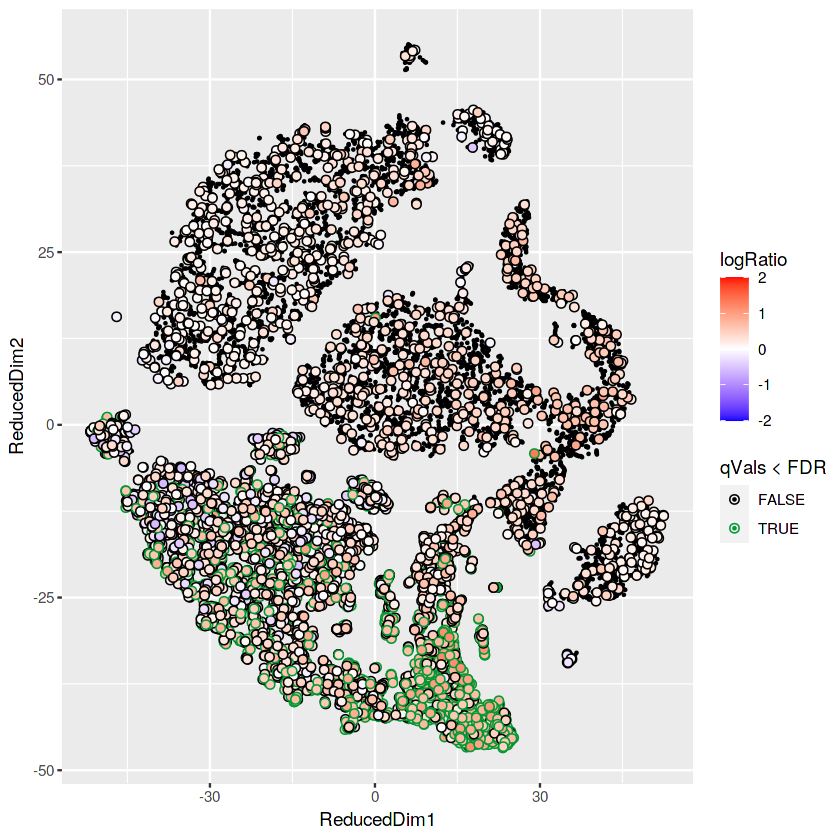

In [41]:
gg = plotMarkerMap(sc1, "RBFOX3")
plot(gg)

In [42]:
sc1 = setContaminationFraction(sc1, 0.2)

In [43]:
head(sc1$soupProfile[order(sc1$soupProfile$est, decreasing = TRUE), ], n = 20)

est         counts
MALAT1     0.030700792 382717
AC120193.1 0.005794146  72230
PCDH9      0.005020524  62586
RBFOX1     0.004729172  58954
NRXN3      0.004017157  50078
NRXN1      0.003671417  45768
CADM2      0.003408543  42491
PHACTR1    0.003295436  41081
DLG2       0.003060317  38150
GPC5       0.003018443  37628
LSAMP      0.002957638  36870
SNHG14     0.002846857  35489
KCNIP4     0.002739926  34156
NLGN1      0.002542510  31695
NRG3       0.002494379  31095
LRP1B      0.002484031  30966
ROBO2      0.002335467  29114
ADGRB3     0.002318140  28898
RALYL      0.002284448  28478
DGKB       0.002175352  27118

In [44]:
sc1 = setClusters(sc1, PBMC_DR$Cluster)

No gene lists provided, attempting to find and plot cluster marker genes.

Found 2314 marker genes

Warning message:
“Removed 175502 rows containing non-finite values (stat_ydensity).”


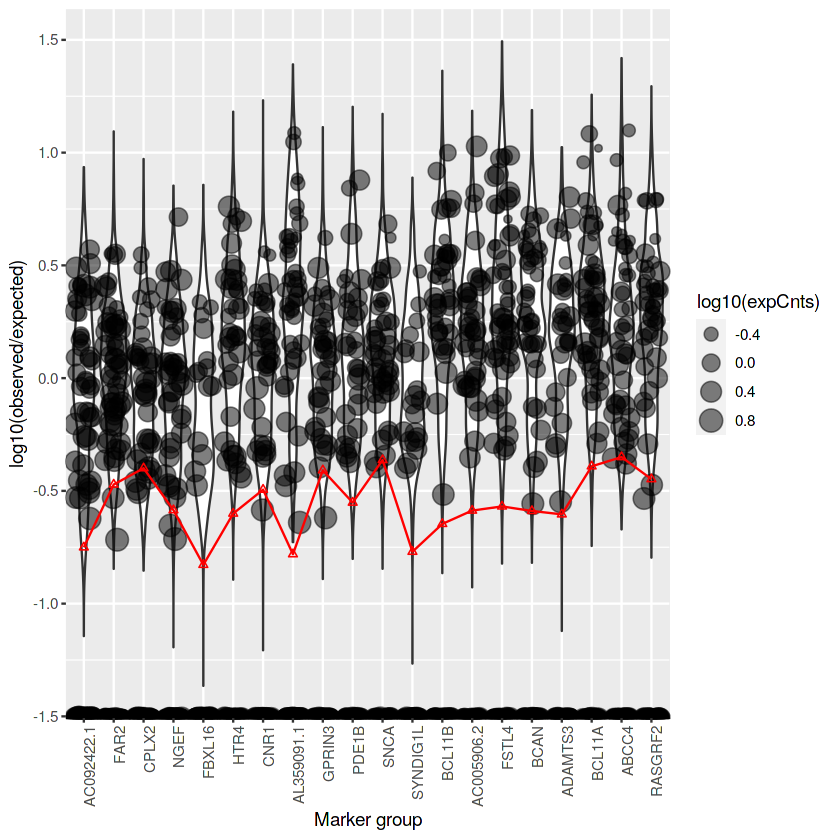

In [45]:
plotMarkerDistribution(sc1)

In [54]:
#str(sc1)

In [45]:
#sc1 = inferNonExpressedGenes(sc1)
##Error in inferNonExpressedGenes(sc1): could not find function "inferNonExpressedGenes"
##Traceback:

In [46]:
igGenes = c("AC092422.1","FAR2","CPLX2","NGEF","FBXL16","HTR4", "CNR1","AL359091.1","GPRIN3","PDE1B","SNCA","SYNDIG1L","BCL11B","AC005906.2","FSTL4","BCAN","ADAMTS3","BCL11A","ABCC4","RASGRF2")



In [47]:
useToEst = estimateNonExpressingCells(sc1, nonExpressedGeneList = list(IG = igGenes))

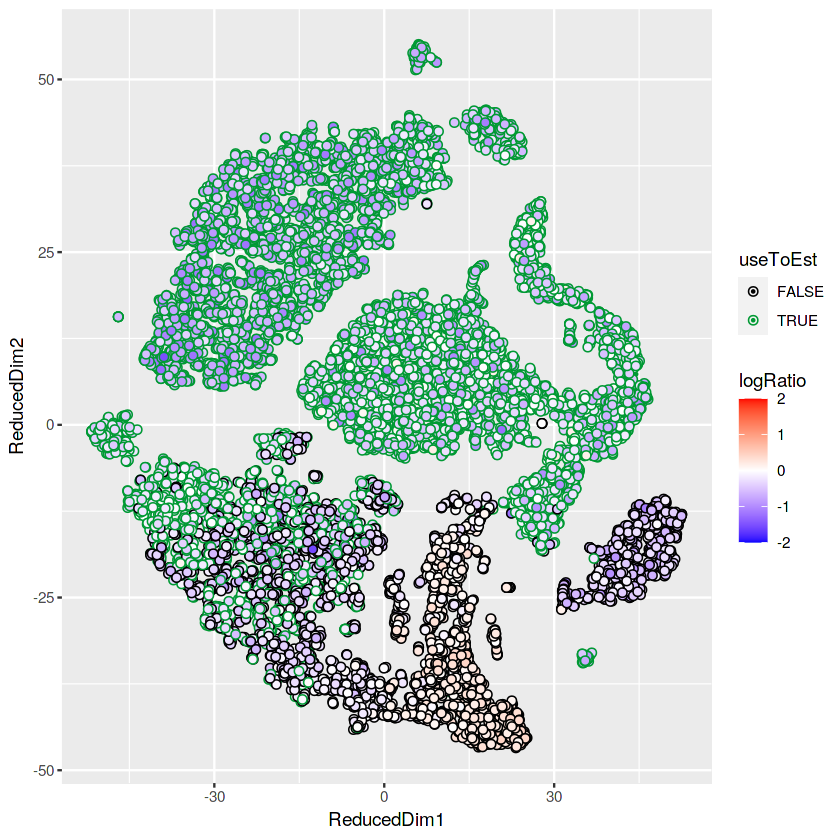

In [48]:
plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst)

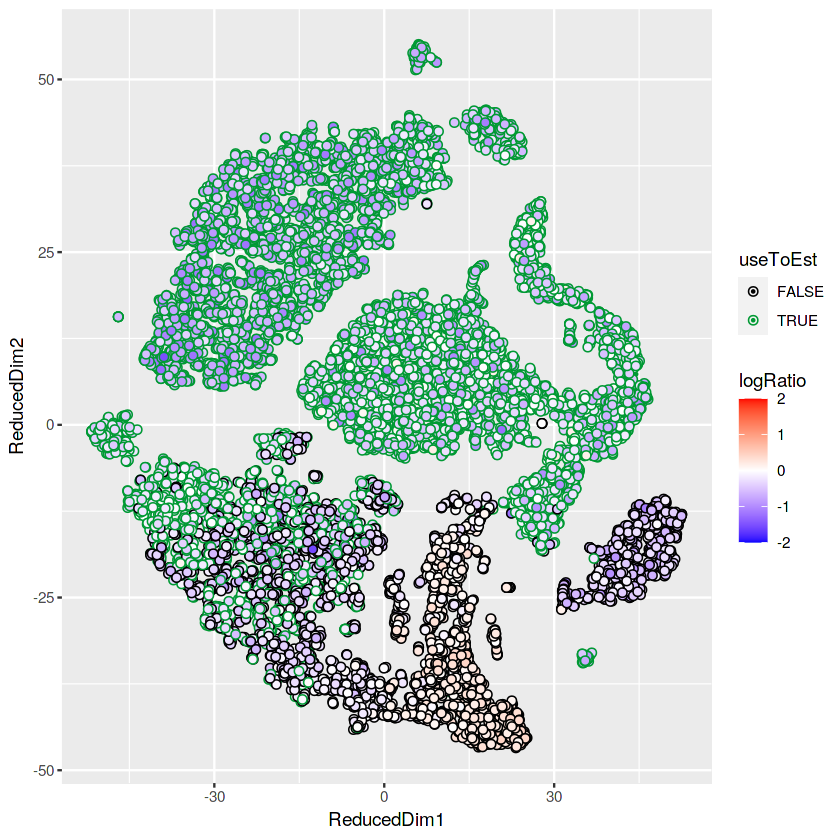

In [49]:
useToEst = estimateNonExpressingCells(sc1, nonExpressedGeneList = list(IG = igGenes), 
    clusters = setNames(PBMC_DR$Cluster, rownames(PBMC_DR)))
plotMarkerMap(sc1, geneSet = igGenes, DR = PBMC_DR, useToEst = useToEst)

In [50]:
sc1 = setClusters(sc1, PBMC_DR$Cluster)

In [51]:
sc1 = calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst)

Warning message in setContaminationFraction(sc, exp(coef(sc$fit)), forceAccept = forceAccept):
“Estimated contamination is very high (0.44).”
Estimated global contamination fraction of 44.16%



In [52]:
head(sc1$metaData)

nUMIs RD1       RD2        rho       clusters rhoLow   
AAACCCAAGCCATGCC-1 10530 17.604711 -20.032021 0.4415876 9        0.4382959
AAACCCAAGTATTGCC-1 15649 23.168258 -41.756313 0.4415876 3        0.4382959
AAACCCACAAATGGAT-1  3836 24.176257  23.244681 0.4415876 8        0.4382959
AAACCCACACGCCACA-1  8730 -8.612698 -13.019087 0.4415876 6        0.4382959
AAACCCACAGGAATAT-1  2871 18.650336 -12.121558 0.4415876 3        0.4382959
AAACCCACAGTTAGGG-1  1922 37.275118  -1.321172 0.4415876 4        0.4382959
                   rhoHigh  
AAACCCAAGCCATGCC-1 0.4448958
AAACCCAAGTATTGCC-1 0.4448958
AAACCCACAAATGGAT-1 0.4448958
AAACCCACACGCCACA-1 0.4448958
AAACCCACAGGAATAT-1 0.4448958
AAACCCACAGTTAGGG-1 0.4448958

In [53]:
sc1 = calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst, 
    cellSpecificEstimates = TRUE)
quantile(sc1$metaData$rho)

ERROR: Error in calculateContaminationFraction(sc1, list(IG = igGenes), useToEst = useToEst, : unused argument (cellSpecificEstimates = TRUE)


In [54]:
##Manual alternative
#sc = setContaminationFraction(sc, 0.1)

In [55]:
out = adjustCounts(sc1, clusters = setNames(PBMC_DR$Cluster, rownames(PBMC_DR)))

Expanding counts from 25 clusters to 12185 cells.



In [56]:
library(Matrix)
cntSoggy = rowSums(sc1$toc > 0)
cntStrained = rowSums(out > 0)
mostZeroed = tail(sort((cntSoggy - cntStrained)/cntSoggy), n = 10)
mostZeroed

AC120114.2      ADAD2       PNMT    CCDC103 AC111170.1      CTXN1 AC008798.3 
         1          1          1          1          1          1          1 
     RASD2   U62317.1       PCP4 
         1          1          1

In [57]:
tail(sort(rowSums(sc1$toc > out)/rowSums(sc1$toc > 0)), n = 20)

COL18A1-AS1     SLC19A1   LINC01694       PCBP3  AL133492.1  AJ011931.2 
          1           1           1           1           1           1 
     COL6A1      COL6A2     SPATC1L         LSS  AP001469.1  MCM3AP-AS1 
          1           1           1           1           1           1 
     MCM3AP        YBEY    C21orf58        PCNT    RPL18AP2       DIP2A 
          1           1           1           1           1           1 
      S100B       PRMT2 
          1           1

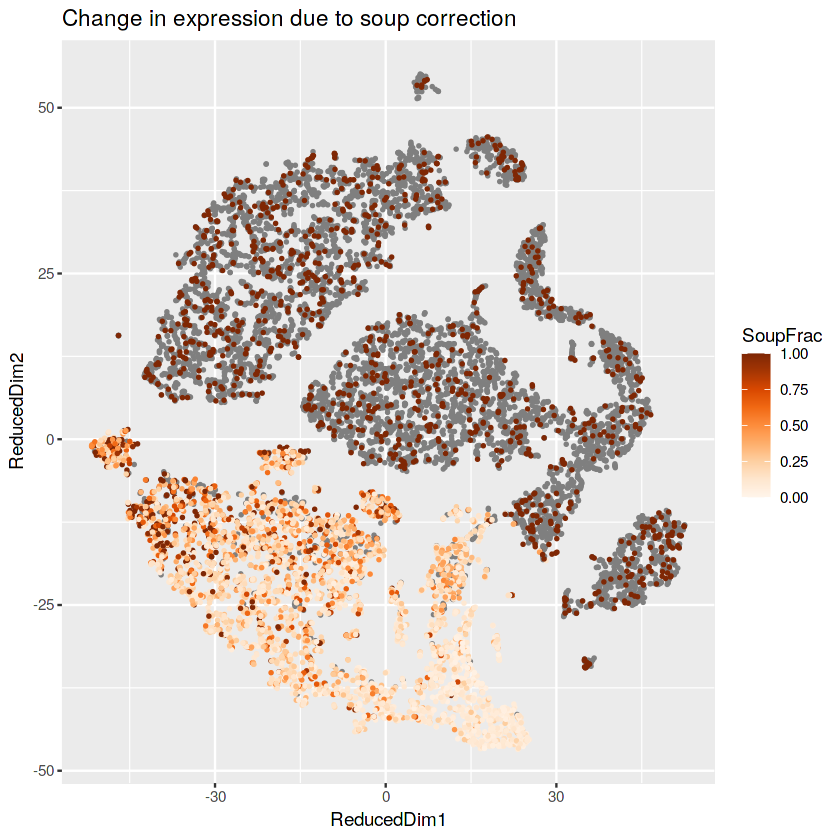

In [58]:
plotChangeMap(sc1, out, "RBFOX3")

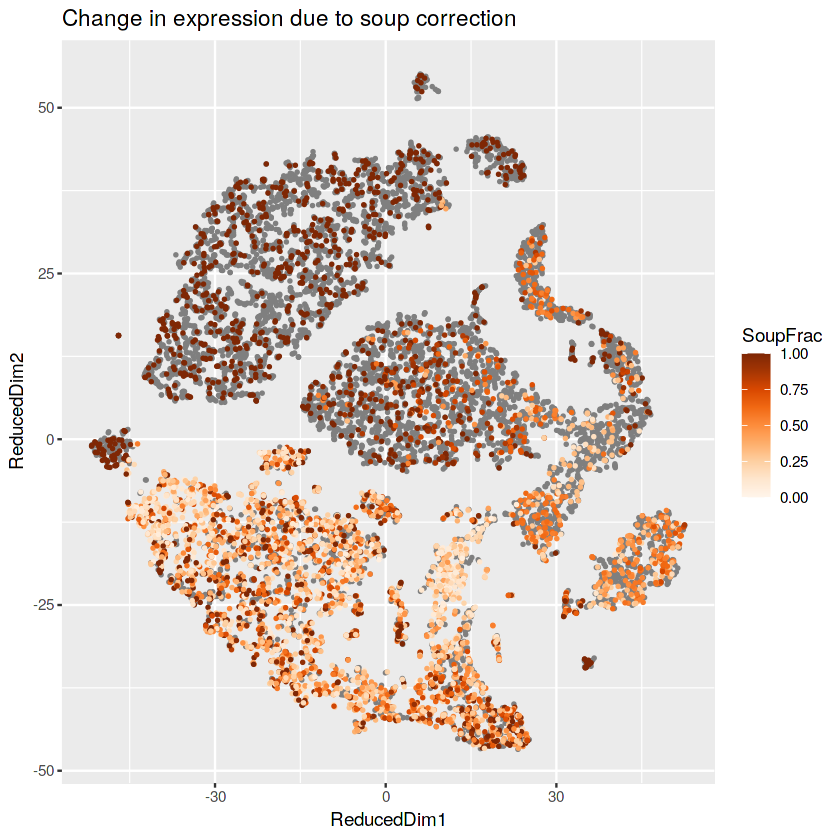

In [59]:
plotChangeMap(sc1, out, "GAD1")

In [60]:
DropletUtils:::write10xCounts("./strainedCounts_Monkey_P_Nacc_Rep1", out)